In [5]:
from pysam import FastaFile,FastxFile
from ete3 import Tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read the mip indel ancestor file
folder_location         = '/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/data/real/'

## Sample tree 1
tree_name               = 'MBL_243'
nwk_file_path           = folder_location + tree_name + '/psp_ancestors.nwk'
mip_indel_file          = folder_location + tree_name + '/mip_ancestor_indel.fasta'  # indels from MIP
grasp_indel_file        = folder_location + tree_name + '/bep_grasp_all_indel.fasta' # indels from grasp
sicp_indel_file         = folder_location + tree_name + '/sicp_grasp_all_indel.fasta' # indels from grasp
psp_indel_file          = folder_location + tree_name + '/psp_grasp_all_indel.fasta' # indels from grasp


In [19]:
def get_indel_events(str1,str2):
    dis = 0
    prev_dis = 0

    for i in range(0,len(str1)):
        curr_dis = int(str1[i]) - int(str2[i])
        
        if curr_dis != 0 and curr_dis != prev_dis:
            dis += 1
        prev_dis = curr_dis
        
    return dis

In [18]:
def get_whole_tree_indel_events(method_fasta_file,nwk_file_path,col,plot_title,method_name):
    level = 0
    extant_list = []
    
    # sequence info
    sequences_fasta_info = FastaFile(method_fasta_file)
    
    # tree file
    tree_file = open(nwk_file_path,"r")
    my_tree = tree_file.read() + ";"
    tree = Tree(my_tree, format=1)
    
    for n in tree.traverse():
        if n.up is not None: # root node
            n.add_features(level = n.up.level + 1)
            seq_name = n.name
            indel_sequence_curr_level = sequences_fasta_info.fetch(n.name)
            indel_sequence_up_level   = sequences_fasta_info.fetch(n.up.name)
            total_indel_events = get_indel_events(indel_sequence_up_level,indel_sequence_curr_level)
            n.add_features(indel_events = total_indel_events + n.up.indel_events)
        else:
            n.add_features(level = level)
            n.add_features(indel_events = 0)

        if n.is_leaf() == True:
            extant_list.append(n.name)

    tree_exp_indel_event = []
    for ext in extant_list:
        x_node_trav = []
        y_node_trav = []
        node = tree.search_nodes(name=ext)[0]
        while node:
            x_node_trav.append(node.level)
            y_node_trav.append(node.indel_events)
            node = node.up
        tree_exp_indel_event.append([x_node_trav,y_node_trav])
        
    return tree_exp_indel_event


#     plt.rcParams["figure.figsize"] = [10,10] 
#     plt.rcParams["figure.dpi"] = 500
#     #plt.title(plot_title)
#     plt.ylim(0, 150)
#     plt.xlim(0,30)
#     for pts in tree_exp_indel_event:

#         #plt.scatter(pts[0],pts[1],s=0.1,color=col)
#         plt.plot(pts[0],pts[1], '-o',color=col,linewidth=0.5,markersize=1)

#     plt.savefig('/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/plots_for_paper/tree_' + method_name + '.png',dpi=100)
#     plt.show()

In [20]:
bep_indel_event  = get_whole_tree_indel_events(grasp_indel_file,nwk_file_path,'#0F52BA',"MBL 243: Method - BEP","BEP")
psp_indel_event  = get_whole_tree_indel_events(psp_indel_file,  nwk_file_path, '#DD3300',"MBL 243: Method - PSP","PSP")
sicp_indel_event = get_whole_tree_indel_events(sicp_indel_file, nwk_file_path, '#00DD03',"MBL 243: Method - SICP","SICP")
mip_indel_event  = get_whole_tree_indel_events(mip_indel_file,  nwk_file_path, '#58181F',"MBL 243: Method - MIP","MIP")

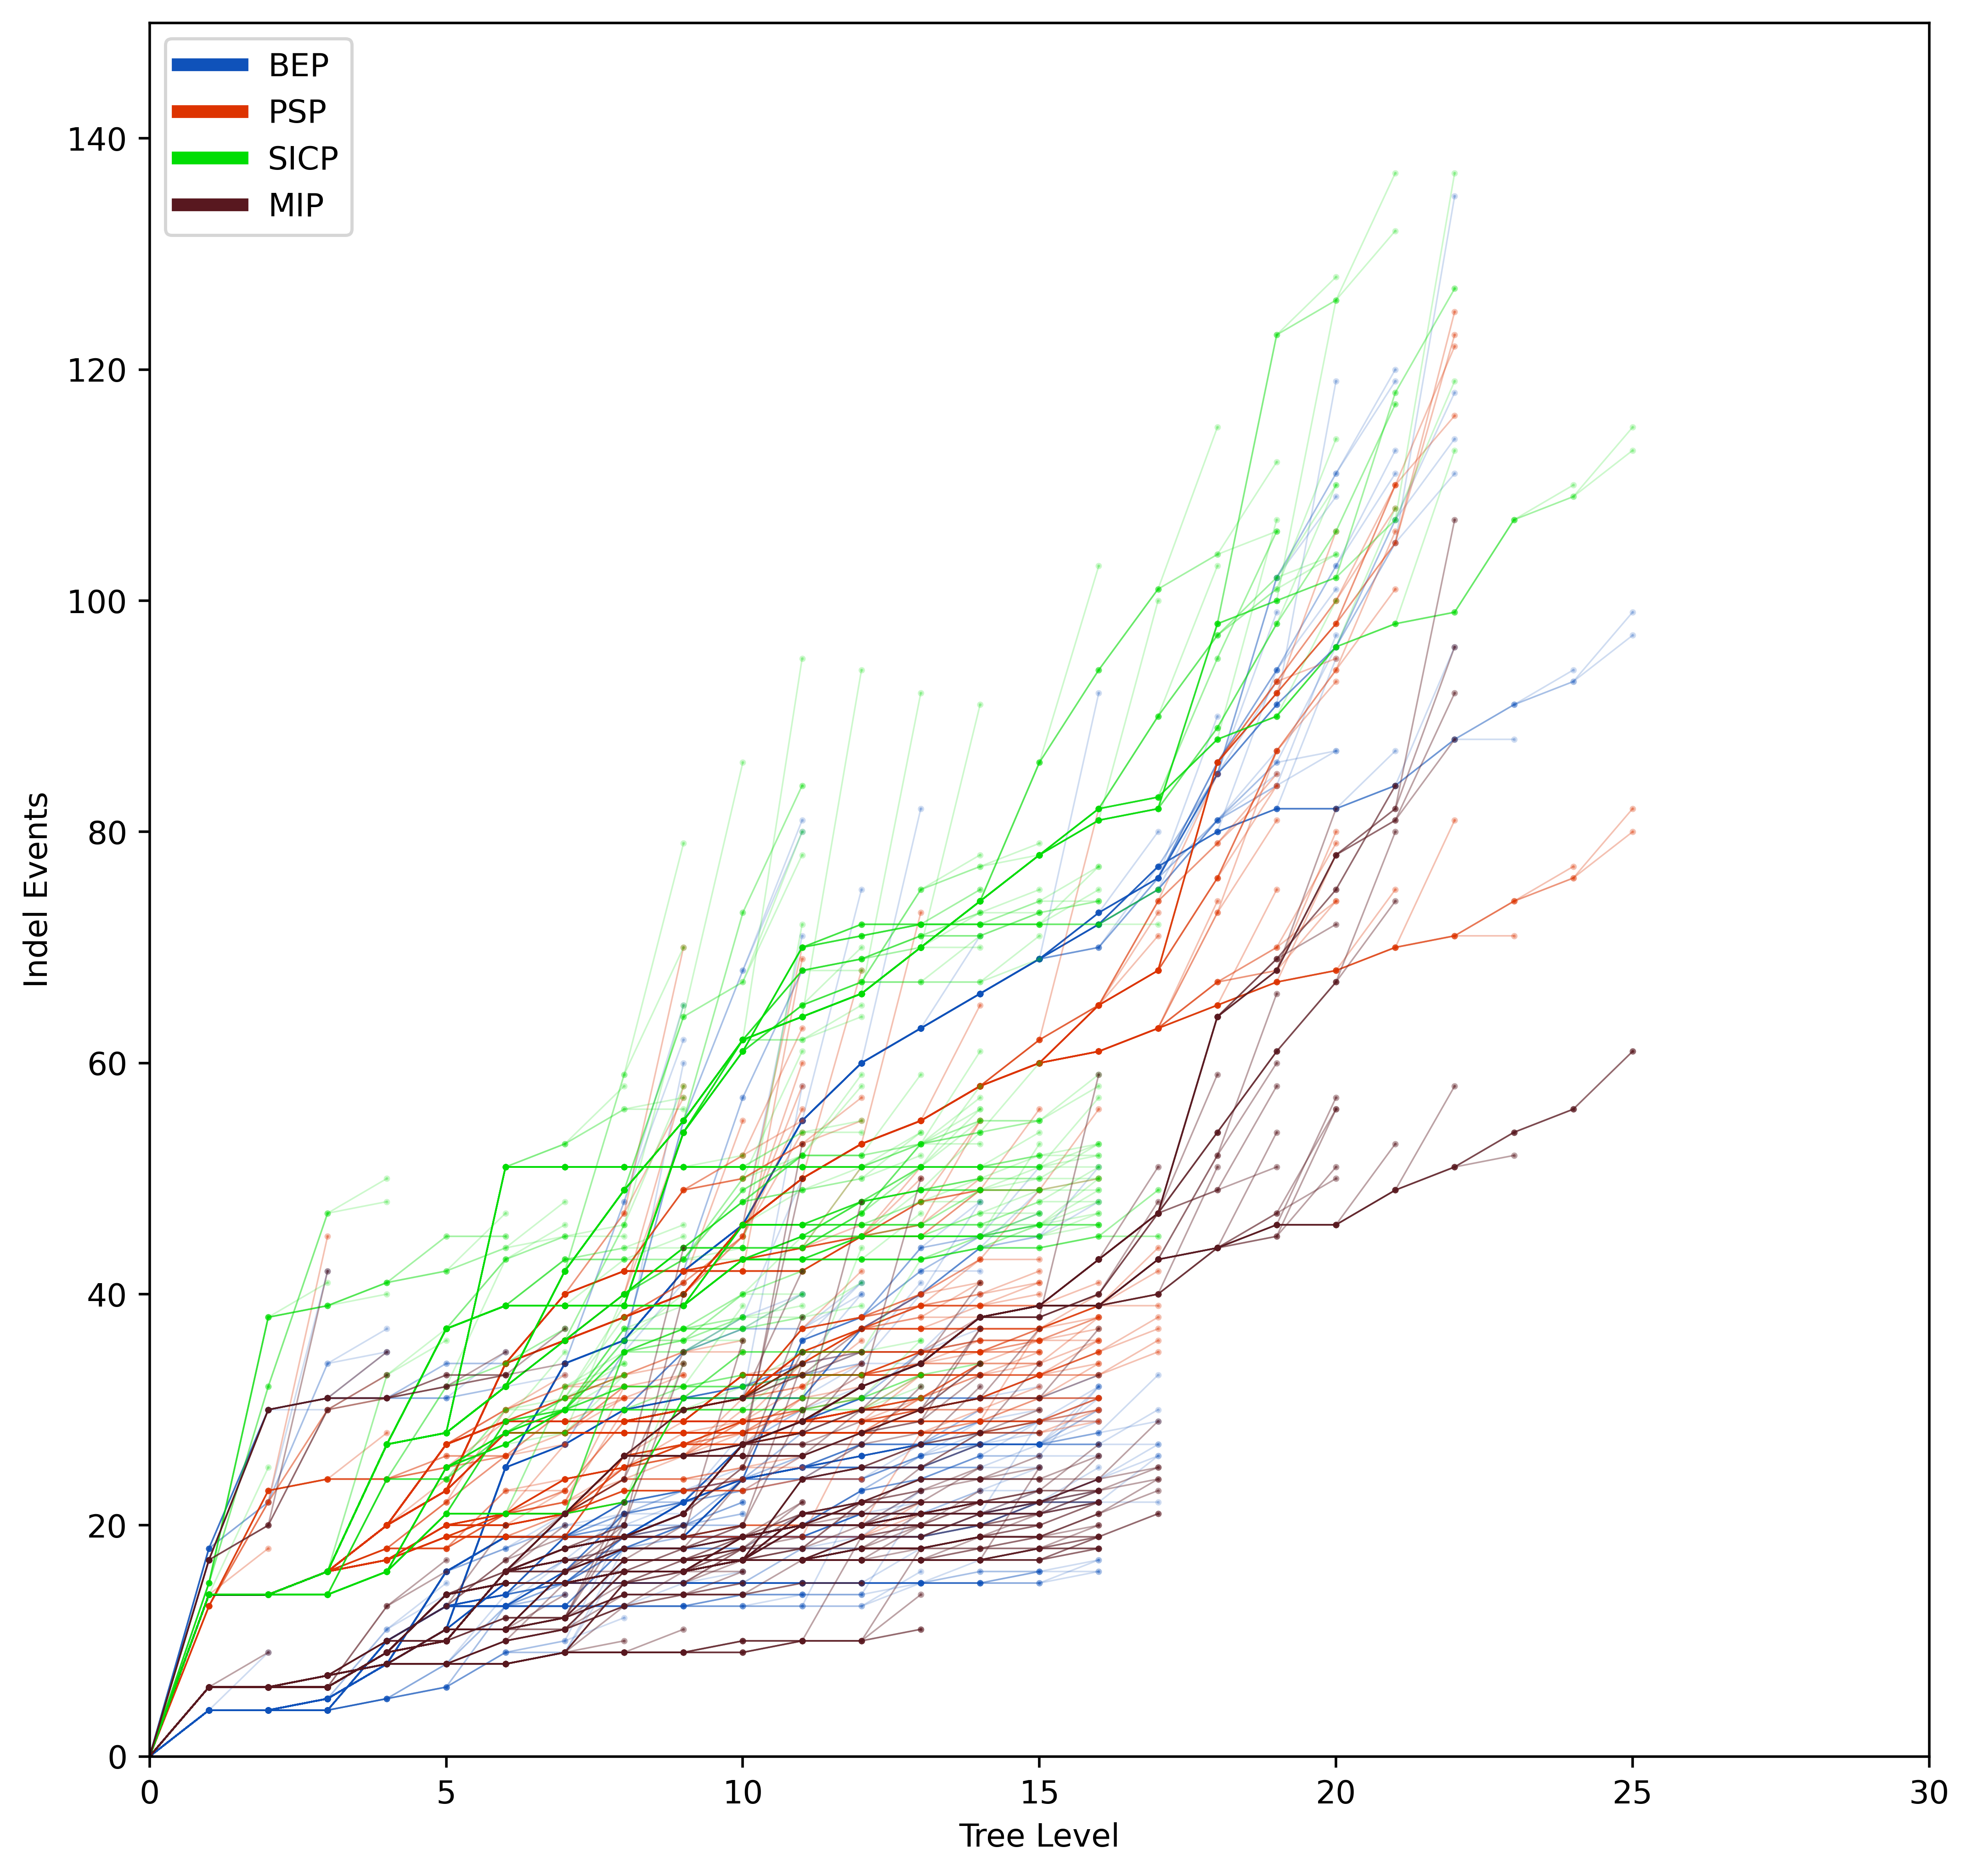

In [41]:
plt.rcParams["figure.figsize"] = [10,10] 
plt.rcParams["figure.dpi"] = 500
#plt.title(plot_title)
plt.ylim(0, 150)
plt.xlim(0,30)
plt.xlabel("Tree Level")
plt.ylabel("Indel Events")


legend_elements = [Line2D([0], [0], color='#0F52BA', lw=4, label='BEP'),
                   Line2D([0], [0], color='#DD3300', lw=4, label='PSP'),
                   Line2D([0], [0], color='#00DD03', lw=4, label='SICP'),
                   Line2D([0], [0], color='#58181F', lw=4, label='MIP')]

for pts in bep_indel_event:
    plt.plot(pts[0],pts[1], '-o',color='#0F52BA',alpha=0.2,linewidth=0.5,markersize=1)
for pts in psp_indel_event:
    plt.plot(pts[0],pts[1], '-o',color='#DD3300',alpha=0.3,linewidth=0.5,markersize=1)
for pts in sicp_indel_event:
    plt.plot(pts[0],pts[1], '-o',color='#00DD03',alpha=0.2,linewidth=0.5,markersize=1)
for pts in mip_indel_event:
    plt.plot(pts[0],pts[1], '-o',color='#58181F',alpha=0.4,linewidth=0.5,markersize=1)

plt.legend(handles=legend_elements, loc='upper left')
plt.savefig('/Users/sanjanatule/Documents/uq/Projects/Indels/indelmip/plots_for_paper/combined_tree_plot.png',dpi=1000)
plt.show()